Time Series = Set of Observations recorded over time, Usually at a regular frequency.

In [1]:
import pandas as pd

df = pd.read_csv("spotify.csv", index_col="Date", parse_dates=["Date"])

df.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


In [2]:
df = pd.read_csv("book_sales.csv", index_col="Date", parse_dates=["Date"])

df.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


Forecasting models can be constructed using linear regression algorithms, which can adapt to complex forecasting tasks.

The linear regression algorithm learns how to make a weighted sum from its input features. For two features, we would have:

`target = weight_1 * feature_1 + weight_2 * feature_2 + bias`

- Optimal values for weight_1, weight_2 and bias are learnt during training.
- This algorithm is also called _ordinary least squares_ since the values chosen minimise the squared error between the target and the predictions.
- Weights are also called regression coefficients and bias is also called the intercept.

### Features of Time Series
There are 2 kinds of features unique to time series -
1. **Time-step features**
    - Derived directly from the time index.
    - Most basic time-step feature is the time dummy, which counts steps in the series from beginning to end.


In [18]:
import numpy as np

df['Time'] = np.arange(len(df.index))  # np.arange() returns a Series with equally-spaced intervals till required range.

df.head()

,Hardcover,Lag_1,Time
Date,,,
2000-04-01,139,NaN,0
2000-04-02,128,139.0,1
2000-04-03,172,128.0,2
2000-04-04,139,172.0,3
2000-04-05,191,139.0,4


Linear regression with time dummy:

`target = weight * time + bias`

time forms the x-axis.

<Axes: xlabel='Time', ylabel='Hardcover'>

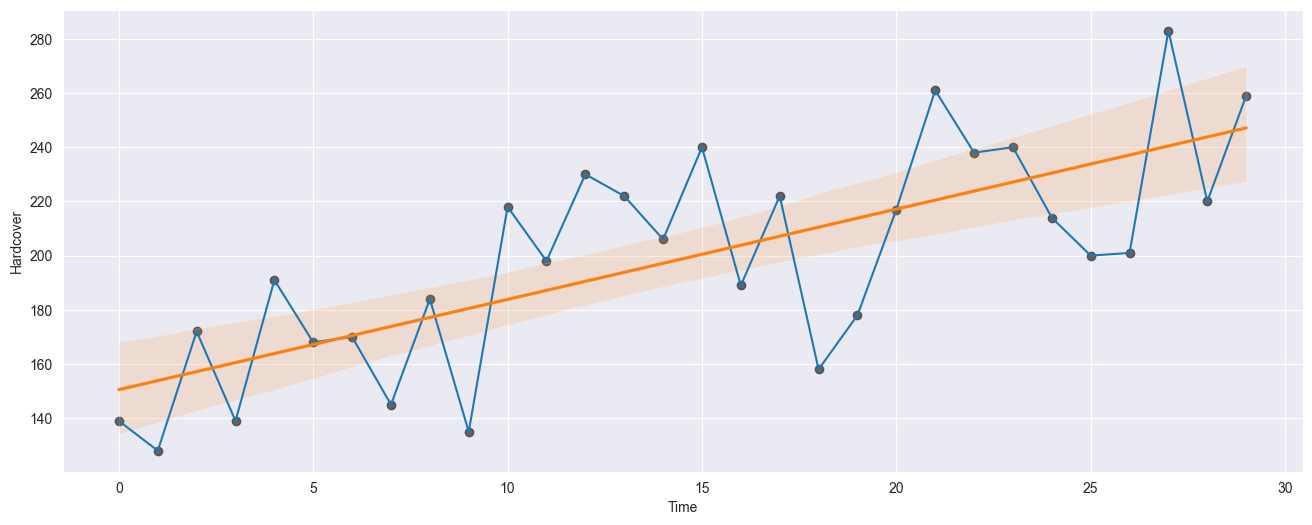

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.set_style("darkgrid")
sns.lineplot(x='Time', y='Hardcover', data=df)
sns.regplot(x='Time', y='Hardcover', data=df, scatter_kws=dict(color='0.25'))

Time dependence can be modelled using time-step features. A series is time dependent if its values can be predicted from the time they occured.

2. **Lag Features**:
    - Observations of the target series are shifted so that they appear to have occured later in time.
    - 1 or multi-step lag features are used.

In [20]:
df['Lag_1'] = df.Hardcover.shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


<Axes: xlabel='Lag_1', ylabel='Hardcover'>

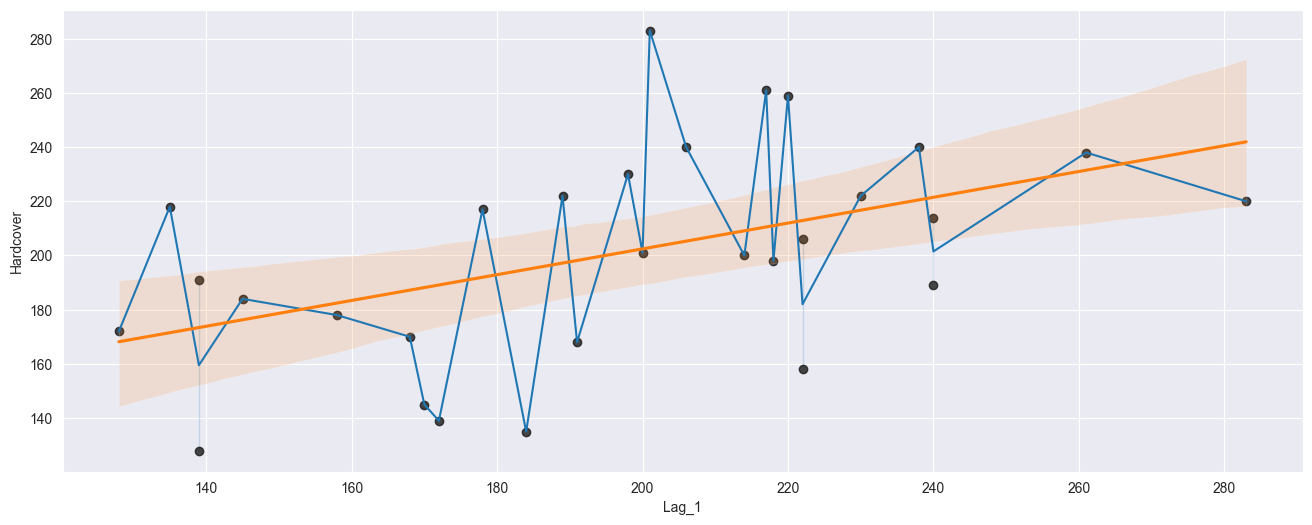

In [23]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid")
sns.lineplot(x='Lag_1', y='Hardcover', data=df)
sns.regplot(x='Lag_1', y='Hardcover', data=df, scatter_kws=dict(color='0.1'))